# Analyze inference outputs

### imports and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import os


In [53]:
os.chdir('../soundbay')

# result_path = "./outputs/Inference_results-2022-11-03_best_manatee_2022_train_val_test_splits_80_20.csv"
result_path = "./outputs/Inference_results-2023-01-01_19-16-43-best-manatee_update_sample_0.2_each_day_no_outliers.csv"
os.path.exists(result_path)

True

In [54]:
dataframe = pd.read_csv(result_path)

In [55]:
dataframe

,Selection,View,channel,begin_time,end_time,Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Agg Entropy (bits),Center Freq (Hz),PFC Max Freq (Hz),PFC Min Freq (Hz),Max Freq (Hz),Annotation,filename,StartMicInWater,EndMicInWater,filepath,label,call_length,split_type,date_str,0,1
0,2,Spectrogram 1,1,13.317046,13.517046,3000.000,4350.000,0.1964,1350.000,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,val,211127,5.455263e-01,0.454474
1,2,Spectrogram 1,1,13.517046,13.717046,3000.000,4350.000,0.1964,1350.000,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,val,211127,9.970251e-01,0.002975
2,2,Spectrogram 1,1,13.717046,13.917046,3000.000,4350.000,0.1964,1350.000,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,val,211127,9.972032e-01,0.002797
3,2,Spectrogram 1,1,13.917046,14.117046,3000.000,4350.000,0.1964,1350.000,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,val,211127,9.973295e-01,0.002671
4,2,Spectrogram 1,1,14.117046,14.317046,3000.000,4350.000,0.1964,1350.000,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,val,211127,9.975033e-01,0.002497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67198,26,Spectrogram 1,1,235.218737,235.418737,4449.438,5528.090,0.2426,1078.652,-49.98,2.446,4875.0,5437.5,4500.0,5437.5,Y,220228_0118,72.025812,282.054769,annotations,1,0.2,test,220228,3.433529e-05,0.999966
67199,27,Spectrogram 1,1,240.641021,240.841021,4314.607,5662.921,0.2574,1348.314,-47.96,2.244,4875.0,5625.0,4687.5,4875.0,N,220228_0118,72.025812,282.054769,annotations,1,0.2,test,220228,1.674289e-04,0.999833
67200,28,Spectrogram 1,1,246.266020,246.466020,4314.607,5797.753,0.2868,1483.146,-40.62,2.490,4875.0,5625.0,4687.5,5625.0,Y,220228_0118,72.025812,282.054769,annotations,1,0.2,test,220228,3.863790e-07,1.000000
67201,29,Spectrogram 1,1,261.537936,261.737936,4988.764,6067.416,0.2279,1078.652,-49.32,2.346,5250.0,6000.0,5062.5,5062.5,N,220228_0118,72.025812,282.054769,annotations,1,0.2,test,220228,2.678244e-03,0.997322


### divide to gt and predictions

In [72]:
label = dataframe['label'].to_numpy()
pred_probs = dataframe[['0','1']].to_numpy()

threshold = 0.8 # change threshold for optimization (was 0.99999)

pred = (pred_probs[:,1]>threshold).astype(int)
dataframe['pred']=pred

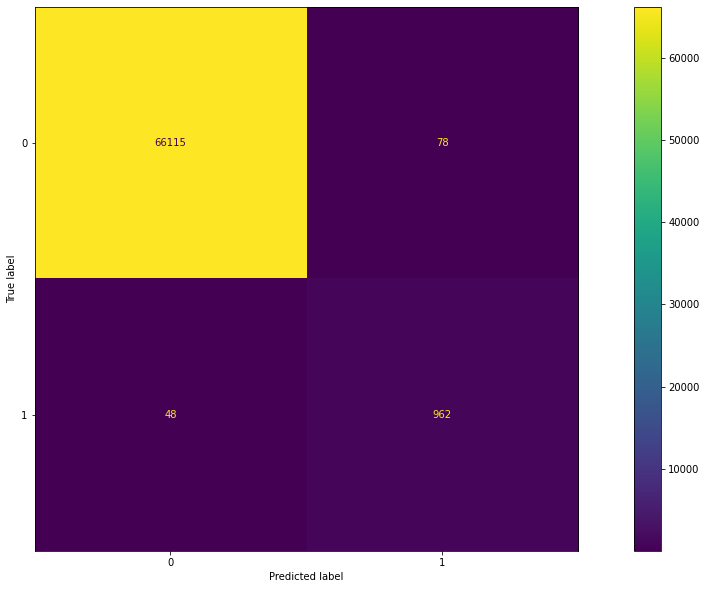

{'global': {'accuracy': 0.9981250837016205,
  'call_average_precision_macro': 0.9781621987211369,
  'bg_average_precision': 0.9999941026438077,
  'call_f1_macro': 0.9385365853658537,
  'bg_f1': 0.9990480220012694,
  'bg_precision': 0.9992745189909769,
  'bg_recall': 0.9988216276645566},
 'calls': {'precision': 0.925,
  'recall': 0.9524752475247524,
  'f1': 0.9385365853658537}}

In [73]:
class_id = 1
metrics_dict = {
            'global': {'accuracy': metrics.accuracy_score(label, pred),
                       'call_average_precision_macro': np.nanmean([metrics.average_precision_score(
                           label == i, pred_probs[:, i]) for i in range(1, pred_probs.shape[1])]),
                       'bg_average_precision': metrics.average_precision_score(label == 0, pred_probs[:, 0]),
                       'call_f1_macro': metrics.f1_score(label, pred, average='macro',
                                                         labels=list(range(1, pred_probs.shape[1]))),
                       'bg_f1': metrics.f1_score(label == 0, pred == 0),
                       'bg_precision': metrics.precision_score(label == 0, pred == 0),
                       'bg_recall': metrics.recall_score(label == 0, pred == 0),
                       },
            'calls': {'precision': metrics.precision_score(label == class_id, pred == class_id),
                'recall': metrics.recall_score(label == class_id, pred == class_id),
                'f1': metrics.f1_score(label == class_id, pred == class_id),}
            }

conf_mat = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()
metrics_dict

In [9]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

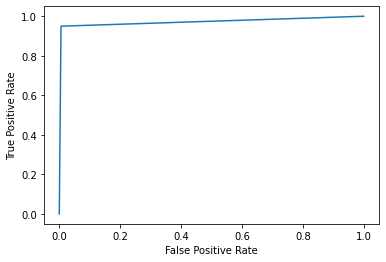

In [11]:
plot_roc_curve(label,pred)

In [10]:
pd.set_option('display.max_columns', None)
dataframe.head()

,Selection,View,channel,begin_time,end_time,Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Agg Entropy (bits),Center Freq (Hz),PFC Max Freq (Hz),PFC Min Freq (Hz),Max Freq (Hz),Annotation,filename,StartMicInWater,EndMicInWater,filepath,label,call_length,split_type,date_str,0,1,pred
0,2,Spectrogram 1,1,13.317046,13.517046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,train,211127,0.128398,0.871602,1
1,2,Spectrogram 1,1,13.517046,13.717046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,train,211127,0.996990,0.003010,0
2,2,Spectrogram 1,1,13.717046,13.917046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,train,211127,0.999057,0.000943,0
3,2,Spectrogram 1,1,13.917046,14.117046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,train,211127,0.999653,0.000347,0
4,2,Spectrogram 1,1,14.117046,14.317046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,train,211127,0.998545,0.001455,0


In [11]:
countbyfile = dataframe.groupby('filename')['label'].sum()
files = dataframe['filename'].unique()
print(sum(countbyfile))
print(countbyfile)
print(files)

1010
filename
211127_0066      4
211208_0072     18
211208_0074     81
211209_0077     45
211210_0079     49
211212_0081     12
211212_0082      8
211213_0083      1
211213_0084      1
211213_0086      8
211220_0089      2
211224_0090      1
211227_0091      0
211227_0093      0
220104_0094     98
220115_0097     39
220118_0098      2
220224_0102    100
220224_0103      4
220224_0104     21
220225_0105    121
220225_0106     16
220225_0108     16
220226_0109     92
220226_0110     14
220226_0111     38
220227_0112    101
220227_0113     30
220227_0114     28
220228_0117     35
220228_0118     25
Name: label, dtype: int64
['211127_0066' '211208_0072' '211208_0074' '211209_0077' '211210_0079'
 '211212_0081' '211212_0082' '211213_0083' '211213_0084' '211213_0086'
 '211220_0089' '211224_0090' '211227_0091' '211227_0093' '220104_0094'
 '220115_0097' '220118_0098' '220224_0102' '220224_0103' '220224_0104'
 '220225_0105' '220225_0106' '220225_0108' '220226_0109' '220226_0110'
 '220226_0111' '

<Figure size 1440x360 with 0 Axes>

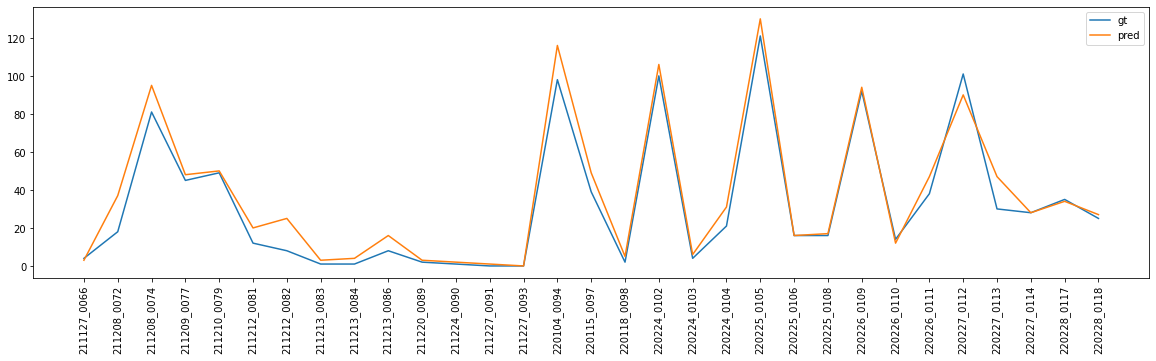

In [14]:
callsbyday = dataframe.groupby(['filename'])['label'].sum().tolist()
callsbydaypred = dataframe.groupby(['filename'])['pred'].sum().tolist()
# df = pd.DataFrame((callsbyday,callsbydaypred), index=dataframe['filename'].unique(), columns=['gt','pred'])
df = pd.DataFrame({'gt':callsbyday, 'pred':callsbydaypred}, index=dataframe['filename'].unique())
plt.figure()
df.plot()
plt.xticks(np.arange(df.index.size),df.index, rotation=90)
plt.rcParams['figure.figsize'] = [20, 10]
# plt.tight_layout()
plt.show()


<ipython-input-24-821c62d4c8dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timeslot'] = pd.qcut(df2['begin_time'], q=10)


<Figure size 1440x360 with 0 Axes>

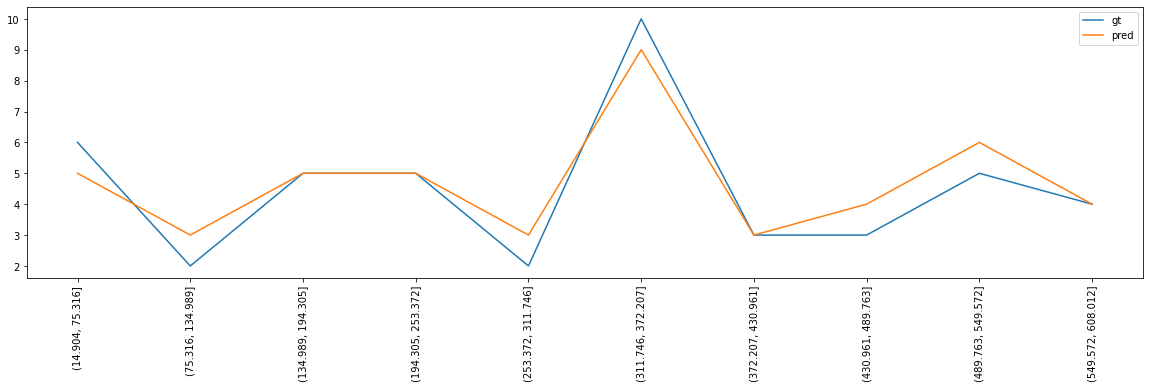

In [24]:
df2 = dataframe.loc[dataframe.filename=='211209_0077']
df2['timeslot'] = pd.qcut(df2['begin_time'], q=10)

callsbytime = df2.groupby(['timeslot'])['label'].sum().tolist()
callsbytimepred = df2.groupby(['timeslot'])['pred'].sum().tolist()
df3 = pd.DataFrame({'gt':callsbytime, 'pred':callsbytimepred}, index=df2['timeslot'].unique())
plt.figure()
df3.plot()
plt.xticks(np.arange(df3.index.size),df3.index, rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
# plt.tight_layout()
plt.show()